In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
from tensorflow import keras

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x1, y1 = np.unique(y_train, return_counts=True)

In [4]:
# labels
x1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
# frequency of each label
y1

array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])

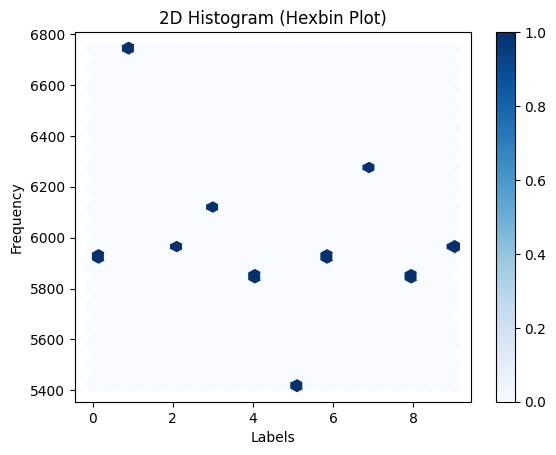

In [6]:
plt.hexbin(x1, y1, gridsize=30, cmap='Blues')

# Adding labels and title
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('2D Histogram (Hexbin Plot)')

# Adding colorbar
plt.colorbar()

# Display the plot
plt.show()

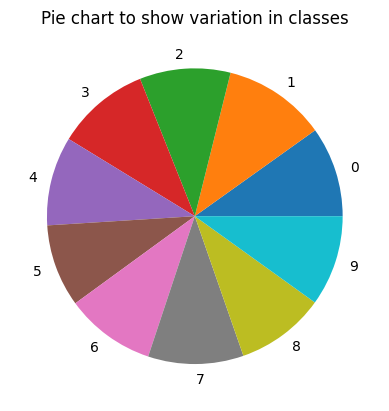

In [7]:
plt.pie(y1, labels = x1)
plt.title("Pie chart to show variation in classes")
plt.show()

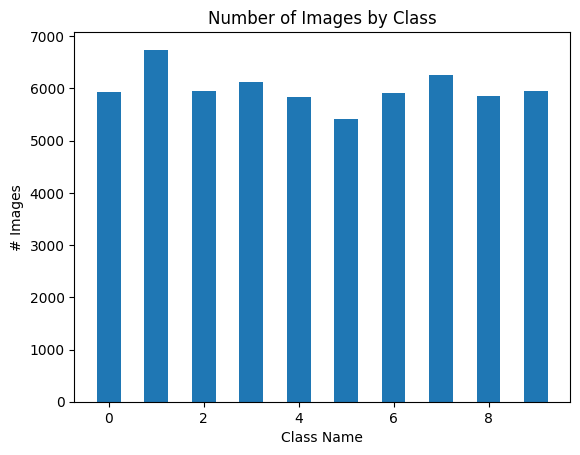

In [8]:
plt.bar(x1, y1, width = .5);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('# Images');

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train = X_train.reshape(-1,28,28,1)    #training set
X_test = X_test.reshape(-1,28,28,1)      #test set

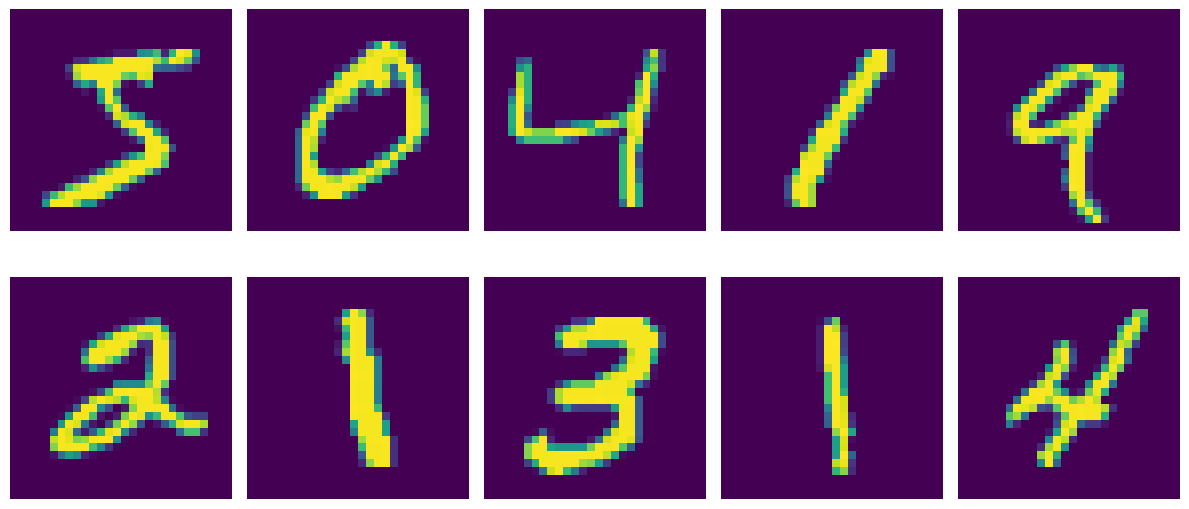

In [11]:
num_digits_to_plot = 10

plt.figure(figsize=(12, 6))
for i in range(num_digits_to_plot):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i][:,:,0])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [12]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(28, 28,1),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))


In [13]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.05)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

Epoch 1/10
1782/1782 [==============================] - 21s 5ms/step - loss: 0.2135 - accuracy: 0.9343 - val_loss: 0.0617 - val_accuracy: 0.9843
Epoch 2/10
1782/1782 [==============================] - 7s 4ms/step - loss: 0.0764 - accuracy: 0.9766 - val_loss: 0.0513 - val_accuracy: 0.9860
Epoch 3/10
1782/1782 [==============================] - 7s 4ms/step - loss: 0.0552 - accuracy: 0.9829 - val_loss: 0.0502 - val_accuracy: 0.9853
Epoch 4/10
1782/1782 [==============================] - 7s 4ms/step - loss: 0.0452 - accuracy: 0.9855 - val_loss: 0.0335 - val_accuracy: 0.9917
Epoch 5/10
1782/1782 [==============================] - 7s 4ms/step - loss: 0.0360 - accuracy: 0.9885 - val_loss: 0.0392 - val_accuracy: 0.9900
Epoch 6/10
1782/1782 [==============================] - 8s 4ms/step - loss: 0.0308 - accuracy: 0.9904 - val_loss: 0.0357 - val_accuracy: 0.9897
Epoch 7/10
1782/1782 [==============================] - 8s 4ms/step - loss: 0.0277 - accuracy: 0.9911 - val_loss: 0.0314 - val_accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.0304 - accuracy: 0.9912
Test accuracy: 0.9911999702453613


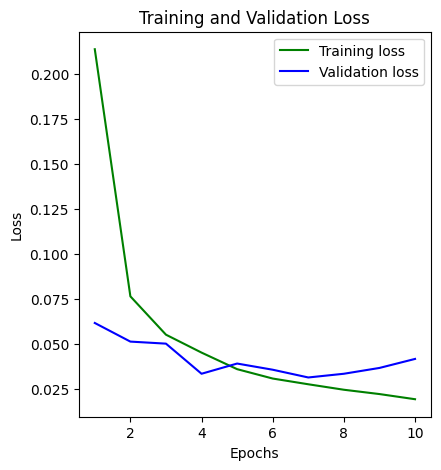

In [14]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [15]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


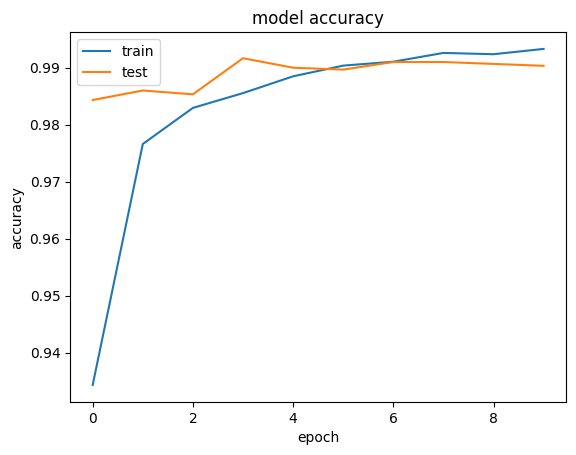

In [16]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

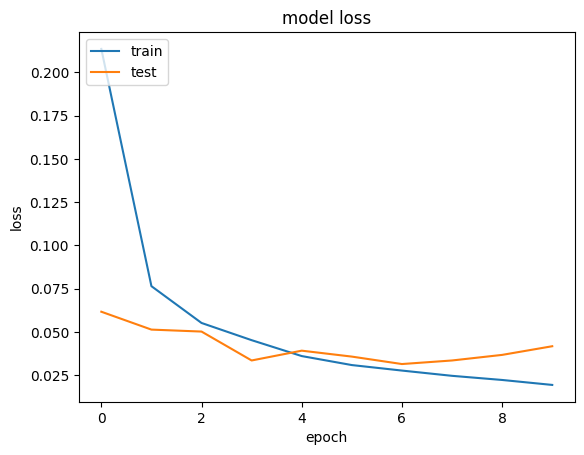

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
y_predicted = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [19]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [20]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 975,    0,    0,    0,    2,    0,    0,    2,    1,    0],
       [   0, 1123,    0,    4,    1,    1,    3,    3,    0,    0],
       [   0,    1, 1028,    0,    1,    0,    0,    2,    0,    0],
       [   0,    0,    1, 1005,    0,    2,    0,    1,    1,    0],
       [   0,    0,    0,    0,  981,    0,    0,    0,    0,    1],
       [   0,    0,    0,    8,    0,  881,    1,    0,    0,    2],
       [   3,    1,    0,    0,    4,    3,  944,    0,    3,    0],
       [   0,    3,    5,    0,    0,    0,    0, 1018,    1,    1],
       [   1,    0,    1,    1,    1,    1,    0,    0,  966,    3],
       [   0,    1,    0,    0,   10,    3,    0,    3,    1,  991]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

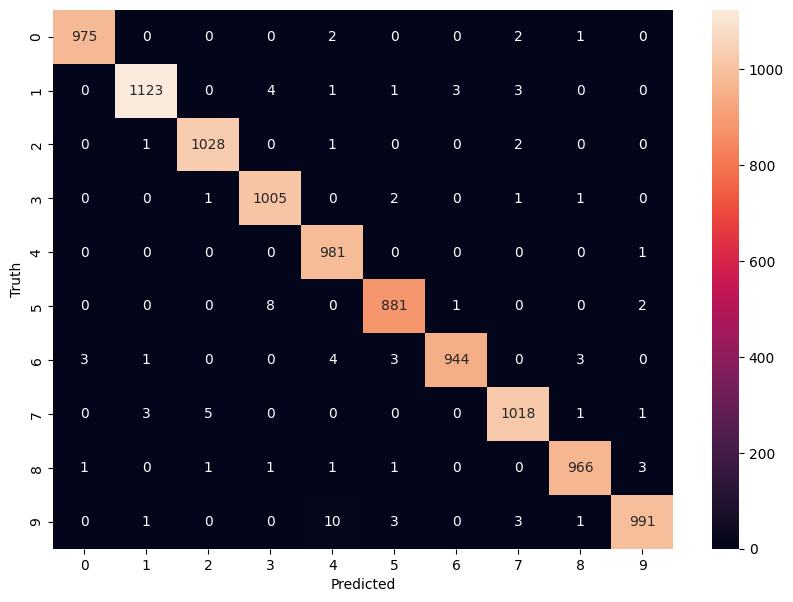

In [21]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')